## Clustering

#### Clustering

Suppose we have $N$ $n$-vectors, $x_1, \ldots, x_N$. The goal of clustering is to group or partition the vectors (if possible) into $k$ groups or clusters, with the vectors in each group close to each other. Clustering is very widely used in many application areas, typically (but not always) when the vectors represent features of objects.

Normally we have $k$ much smaller than $N$, i.e., there are many more vectors than groups. Typical applications use values of $k$ that range from a handful to a few hundred or more, with values of $N$ that range from hundreds to billions. Part of the task of clustering a collection of vectors is to determine whether or not the vectors can be divided into $k$ groups, with vectors in each group near each other. Of course this depends on $k$, the number of clusters, and the particular data, i.e., the vectors $x_1, \ldots, x_N$.

> Following figure shows a simple example, with $N=300$ $2$-vectors, shown as small circles. We can easily see that this collection of vectors can be divided into $k=3$ clusters, shown on the right with the colors representing the different clusters. We could partition these data into other numbers of clusters, but we can see that $k=3$ is a good value.

In [ ]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

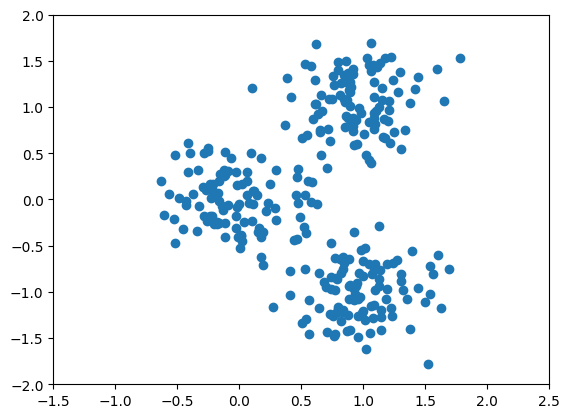

In [ ]:
# data generation

N = 100
X = np.concatenate(
    [
        [0.3 * np.random.randn(2) for i in range(N)],
        [np.array([1, 1]) + 0.3 * np.random.randn(2) for i in range(N)],
        [np.array([1, -1]) + 0.3 * np.random.randn(2) for i in range(N)],
    ]
)

fig, _ = plt.subplots()
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.xlim([-1.5, 2.5])
plt.ylim([-2, 2])
plt.show()

In [ ]:
plt.close(fig)

> This example is not typical in several ways. First, the vectors have dimension $n=2$. Clustering any set of $2$-vectors is easy: We simply scatter plot the values and check visually if the data are clustered, and if so, how many clusters there are. In almost all applications $n$ is larger than $2$ (and typically, much larger than $2$), in which case this simple visual method cannot be used. The second way in which it is not typical is that the points are very well clustered. In most applications, the data are not as cleanly clustered as in this simple example; there are several or even many points that lie in between clusters. Finally, in this example, it is clear that the best choice of $k$ is $k=3$. In real examples, it can be less clear what the best value of $k$ is. But even when the clustering is not as clean as in this example, and the best value of $k$ is not clear, clustering can be very useful in practice.

##### Examples

> __Topic discovery.__ Suppose $x_i$ are word histograms associated with $N$ documents. A clustering algorithm partitions the documents into $k$ groups, which typically can be interpreted as groups of documents with the same or similar topics, genre, or author. Since the clustering algorithm runs automatically and without any understanding of what the words in the dictionary mean, this is sometimes called automatic topic discovery.

> __Patient clustering.__ If $x_i$ are feature vectors associated with $N$ patients admitted to a hospital, a clustering algorithm clusters the patients into $k$ groups of similar patients (at least in terms of their feature vectors).

> __Customer market segmentation.__ Suppose the vector $x_i$ gives the quantities (or dollar values) of $n$ items purchased by customer $i$ over some period of time. A clustering algorithm will group the customers into $k$ market segments, which are groups of customers with similar purchasing patterns.

> __ZIP code clustering.__ Suppose that $x_i$ is a vector giving $n$ quantities or statistics for the residents of ZIP code $i$, such as numbers of residents in various age groups, household size, education statistics, and income statistics. (In this example $N$ is around 40000.) A clustering algorithm might be used to cluster the 40000 ZIP codes into, say, $k=100$ groups of ZIP codes with similar statistics.

> __Student clustering.__ Suppose the vector $x_i$ gives the detailed grading record of student $i$ in a course, i.e., her grades on each question in the quizzes, homework assignments, and exams. A clustering algorithm might be used to cluster the students into $k=10$ groups of students who performed similarly.

> __Survey response clustering.__ A group of $N$ people respond to a survey with $n$ questions. Each question contains a statement, such as 'The movie was too long', followed by some ordered options such as
>
> Strongly Disagree, Disagree, Neutral, Agree, Strongly Agree.
>
> (This is called a Likert scale, named after the psychologist Rensis Likert.) Suppose the $n$-vector $x_i$ encodes the selections of respondent $i$ on the $n$ questions, using the numerical coding $-2,-1,0,+1,+2$ for the responses above. A clustering algorithm can be used to cluster the respondents into $k$ groups, each with similar responses to the survey.

> __Daily energy use patterns.__ The 24-vectors $x_i$ give the average (electric) energy use for $N$ customers over some period (say, a month) for each hour of the day. A clustering algorithm partitions customers into groups, each with similar patterns of daily energy consumption. We might expect a clustering algorithm to 'discover' which customers have a swimming pool, an electric water heater, or solar panels.

#### A clustering objective

##### Specifying the cluster assignments.

We specify a clustering of the vectors by saying which cluster or group each vector belongs to. We label the groups $1, \ldots, k$, and specify a clustering or assignment of the $N$ given vectors to groups using an $N$-vector $c$, where $c_i$ is the group (number) that the vector $x_i$ is assigned to. As a simple example with $N=5$ vectors and $k=3$ groups, $c=(3,1,1,1,2)$ means that $x_1$ is assigned to group $3, x_2, x_3$, and $x_4$ are assigned to group 1 , and $x_5$ is assigned to group 2. We will also describe the clustering by the sets of indices for each group. We let $G_j$ be the set of indices corresponding to group $j$. For our simple example above, we have
$$
G_1=\{2,3,4\}, \quad G_2=\{5\}, \quad G_3=\{1\} .
$$
Formally, we can express these index sets in terms of the group assignment vector $c$ as
$$
G_j=\left\{i \mid c_i=j\right\}
$$
which means that $G_j$ is the set of all indices $i$ for which $c_i=j$.

##### Group representatives.

With each of the groups we associate a group representative $n$-vector, which we denote $z_1, \ldots, z_k$. These representatives can be any $n$-vectors; they do not need to be one of the given vectors. We want each representative to be close to the vectors in its associated group, i.e., we want the quantities
$$
\left\|x_i-z_{c_i}\right\|
$$
to be small. (Note that $x_i$ is in group $j=c_i$, so $z_{c_i}$ is the representative vector associated with data vector $x_i$.)

##### A clustering objective.

We can now give a single number that we use to judge a choice of clustering, along with a choice of the group representatives. We define
$$
J^{\text {clust }}=\left(\left\|x_1-z_{c_1}\right\|^2+\cdots+\left\|x_N-z_{c_N}\right\|^2\right) / N
$$
which is the mean square distance from the vectors to their associated representatives. Note that $J^{\text {clust }}$ depends on the cluster assignments (i.e., c), as well as the choice of the group representatives $z_1, \ldots, z_k$. The smaller $J^{\text {clust }}$ is, the better the clustering. An extreme case is $J^{\text {clust }}=0$, which means that the distance between every original vector and its assigned representative is zero. This happens only when the original collection of vectors only takes $k$ different values, and each vector is assigned to the representative it is equal to. (This extreme case would probably not occur in practice.)

In [ ]:
# given a tuple of vectors, and representatives for groups of vectors,
# what is the average distance each vector has from a representative

x = np.array([[0, 3], [1, 0], [-1, 1]])
reps = np.array([[1, 1], [0, -0.5]])


Text(0.0, -0.5, 'point b')

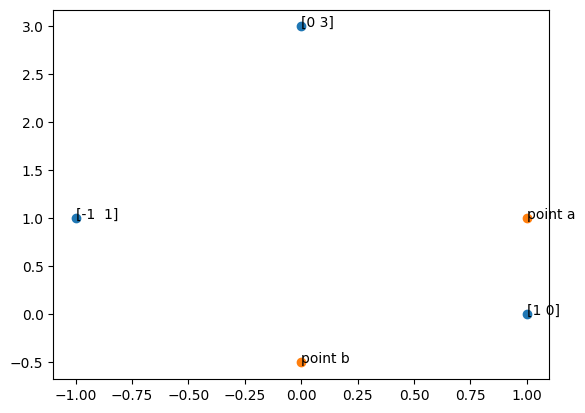

In [ ]:
fig, _ = plt.subplots()

plt.scatter(*zip(*x))
for el in x:
    plt.annotate(str(el), el)

plt.scatter(*zip(*reps))
plt.annotate('point a', reps[0])
plt.annotate('point b', reps[1])


In [ ]:
plt.close(fig)

In [ ]:
x_test = np.array([[0, 0], [2, 2], [0, 0]])
np.linalg.norm(x_test, axis=0)

array([2., 2.])

In [ ]:
def jclust(x, reps, assignment):
    return np.average(np.linalg.norm(x - reps[assignment], axis=1) ** 2)

print(
    f'The distance between vectors and representatives if they are assigned as '
    f'{[1, 1, 1]} is {jclust(x, reps, [1, 1, 1]):.2f}\n'
    f'The distance between vectors and representatives if they are assigned as '
    f'{[0, 1, 1]} is {jclust(x, reps, [0, 1, 1]):.2f}\n'
    f'The distance between vectors and representatives if they are assigned as '
    f'{[0, 0, 0]} is {jclust(x, reps, [0, 0, 0]):.2f}'
)  # assignments are 0 indexed

The distance between vectors and representatives if they are assigned as [1, 1, 1] is 5.58
The distance between vectors and representatives if they are assigned as [0, 1, 1] is 3.17
The distance between vectors and representatives if they are assigned as [0, 0, 0] is 3.33


In [ ]:
data = np.array([[1, 2], [5, 3], [4, 6]])

print(data)
print(data.max(axis=0))
print(data.max(axis=1))


<p align="center">
<img src="https://numpy.org/doc/stable/_images/np_matrix_aggregation_row.png" width="1280">
</p>

##### Partitioning the vectors with the representatives fixed.

Suppose that the group representatives $z_1, \ldots, z_k$ are fixed, and we seek the group assignments $c_1, \ldots, c_N$ that achieve the smallest possible value of $J^{\text {clust}}$. It turns out that this problem can be solved exactly.

The objective $J^{\text {clust }}$ is a sum of $N$ terms. The choice of $c_i$ (i.e., the group to which we assign the vector $x_i$ ) only affects the $i$ th term in $J^{\text {clust}}$, which is $(1 / N)\left\|x_i-z_{c_i}\right\|^2$. We can choose $c_i$ to minimize just this term, since $c_i$ does not affect the other $N-1$ terms in $J^{\text {clust}}$. How do we choose $c_i$ to minimize this term? This is easy: We simply choose $c_i$ to be the value of $j$ that minimizes $\left\|x_i-z_j\right\|$ over $j$. In other words, we should assign each data vector $x_i$ to its nearest neighbor among the representatives. This choice of assignment is very natural, and easily carried out.

So when the group representatives are fixed, we can readily find the best group assignment (i.e., the one that minimizes $J^{\text {clust}}$), by assigning each vector to its nearest representative. With this choice of group assignment, we have (by the way the assignment is made)
$$
\left\|x_i-z_{c_i}\right\|=\min _{j=1, \ldots, k}\left\|x_i-z_j\right\|
$$
so the value of $J^{\text {clust }}$ is given by
$$
\left(\min _{j=1, \ldots, k}\left\|x_1-z_j\right\|^2+\cdots+\min _{j=1, \ldots, k}\left\|x_N-z_j\right\|^2\right) / N .
$$

This has a simple interpretation: It is the mean of the squared distance from the data vectors to their closest representative.

In [ ]:
def assign_to_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# group_assignment(x, reps)
print(
    f"vectors:\n"
    f"{x}\n"
    f"representatives:\n"
    f"{reps}\n"
    f"and their assigned groups are\n"
    f"{assign_to_clusters(x, reps)}"
)

vectors:
[[ 0  3]
 [ 1  0]
 [-1  1]]
representatives:
[[ 1.   1. ]
 [ 0.  -0.5]]
and their assigned groups are
[0 0 1]


In [ ]:
def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

assignments = assign_to_clusters(x, reps)
new_reps = update_centroids(x, assignments, 2)
print(new_reps)

[[ 0.5  1.5]
 [-1.   1. ]]


In [ ]:
print(
    f'The distance between vectors and representatives if they are assigned as '
    f'{[1, 1, 1]} is {jclust(x, new_reps, [1, 1, 1]):.2f}\n'
    f'The distance between vectors and representatives if they are assigned as '
    f'{[0, 1, 1]} is {jclust(x, new_reps, [0, 1, 1]):.2f}\n'
    f'The distance between vectors and representatives if they are assigned as '
    f'{[0, 0, 0]} is {jclust(x, new_reps, [0, 0, 0]):.2f}'
)  # assignments are 0 indexed

print(assign_to_clusters(x, new_reps))

The distance between vectors and representatives if they are assigned as [1, 1, 1] is 3.33
The distance between vectors and representatives if they are assigned as [0, 1, 1] is 2.50
The distance between vectors and representatives if they are assigned as [0, 0, 0] is 2.50
[0 0 1]


#### The $k$-means algorithm

Given a list of $N$ vectors $x_1, \ldots, x_N$, and an initial list of $k$ group representative vectors $z_1, \ldots, z_k$
repeat until convergence
1. Partition the vectors into $k$ groups. For each vector $i=1, \ldots, N$, assign $x_i$ to the group associated with the nearest representative.
2. Update representatives. For each group $j=1, \ldots, k$, set $z_j$ to be the mean of the vectors in group $j$.

In [ ]:
def initialize_centroids(X, k):
    return X[np.random.choice(range(len(X)), k, replace=False)]


def k_means(X, k, max_iters=100, tol=1e-7):

    # Initialize centroids
    centroids = initialize_centroids(X, k)

    for it in range(max_iters):
        # Assign each data point to the closest centroid
        labels = assign_to_clusters(X, centroids)

        # Update centroids
        new_centroids = update_centroids(X, labels, k)

        # Check for convergence
        norm = np.linalg.norm(centroids - new_centroids)

        j_clust = jclust(X, new_centroids, labels)

        print(f"It: {it} | Norm: {norm:.2e} | Jclust: {j_clust:.2e}")

        if norm < tol:
            break

        centroids = new_centroids

    return centroids, labels

In [ ]:
k=3
reps, assignment = k_means(X,k)

It: 0 | Norm: 6.10e-01 | Jclust: 4.90e-01
It: 1 | Norm: 1.48e-01 | Jclust: 4.76e-01
It: 2 | Norm: 1.84e-01 | Jclust: 4.61e-01
It: 3 | Norm: 2.42e-01 | Jclust: 4.31e-01
It: 4 | Norm: 4.24e-01 | Jclust: 3.36e-01
It: 5 | Norm: 3.90e-01 | Jclust: 2.18e-01
It: 6 | Norm: 1.33e-01 | Jclust: 1.89e-01
It: 7 | Norm: 3.76e-02 | Jclust: 1.87e-01
It: 8 | Norm: 0.00e+00 | Jclust: 1.87e-01


((-1.5, 2.5), (-2.0, 2.0))

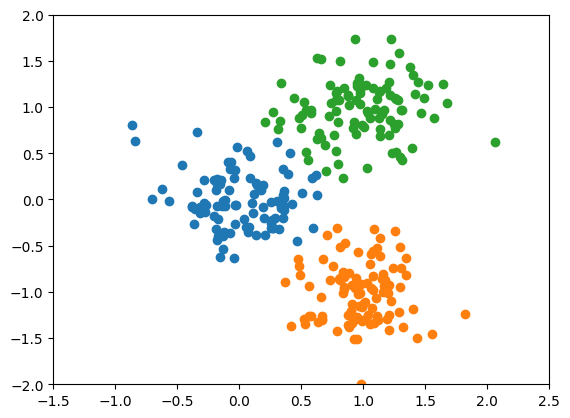

In [ ]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]

fig, _ = plt.subplots()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

In [ ]:
plt.close(fig)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(X)
labels = kmeans.labels_
group_representative = kmeans.cluster_centers_
J_clust = kmeans.inertia_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [ ]:
group_representative

array([[ 0.98572728,  0.97397076],
       [ 0.97108093, -1.0121849 ],
       [ 0.00955763, -0.01051895]])

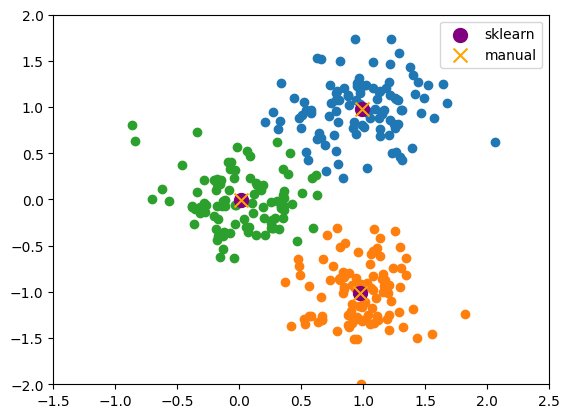

In [ ]:
fig, _ = plt.subplots()

grps = [[X[i, :] for i in range(300) if labels[i] == j] for j in range(3)]
plt.scatter([c[0] for c in grps[0]], [c[1] for c in grps[0]])
plt.scatter([c[0] for c in grps[1]], [c[1] for c in grps[1]])
plt.scatter([c[0] for c in grps[2]], [c[1] for c in grps[2]])

plt.scatter(*zip(*group_representative), marker='o', c='purple', label='sklearn', s=100)

plt.scatter(*zip(*reps), marker='x', c='orange', label='manual', s=100)

plt.xlim(-1.5, 2.5)
plt.ylim(-2, 2)
plt.legend(loc='best')

In [ ]:
plt.close(fig)

In [ ]:
# The distances between points found from sklearn and manual implementation
print("The distances between points found from sklearn and manual implementation is:")
distances = np.linalg.norm(np.array(reps) - np.array(group_representative), axis=1)
for i, distance in enumerate(distances):
    print(f"point {i + 1} | {distance:.2f}")

The distances between points found from sklearn and manual implementation is:
point 1 | 1.39
point 2 | 0.00
point 3 | 1.39


#### Complexity.

In step $1$ of the $k$-means algorithm, we find the nearest neighbor to each of $N$ $n$-vectors, over the list of $k$ centroids. This requires approximately $3 N k n$ flops. In step 2 we average the $n$-vectors over each of the cluster groups. For a cluster with $p$ vectors, this requires $n(p-1)$ flops, which we approximate as $n p$ flops; averaging all clusters requires a total of $N n$ flops. This is less than the cost of partitioning in step $1$. So $k$-means requires around $(3 k+1) N n$ flops per iteration. Its order is $N k n$ flops.

Each run of $k$-means typically takes fewer than a few tens of iterations, and usually $k$-means is run some modest number of times, like $10$. So a very rough guess of the number of flops required to run $k$-means $10$ times (in order to choose the best partition found) is $1000 \mathrm{Nkn}$ flops.

> As an example, suppose we use $k$-means to partition $N=100000$ vectors with size $n=100$ into $k=10$ groups. On a $1 \mathrm{Gflop} / \mathrm{s}$ computer we guess that this will take around 100 seconds. Given the approximations made here (for example, the number of iterations that each run of $k$-means will take), this is obviously a crude estimate.

#### Applications

> ##### Classification.
>
> We cluster a large collection of vectors into $k$ groups, and label the groups by hand. We can now assign (or classify) new vectors to one of the $k$ groups by choosing the nearest group representative. In our example of the handwritten digits above, this would give us a rudimentary digit classifier, which would automatically guess what a written digit is from its image. In the topic discovery example, we can automatically classify new documents into one of the $k$ topics.

> ##### Recommendation engine.
>
> Clustering can be used to build a recommendation engine, which suggests items that a user or customer might be interested in. Suppose the vectors give the number of times a user has listened to or streamed each song from a library of $n$ songs over some period. These vectors are typically sparse, since each user has listened to only a very small fraction of the music library. Clustering the vectors reveals groups of users with similar musical taste. The group representatives have a nice interpretation: $\left(z_j\right)_i$ is the average number of times users in group $j$ listened to song $i$.

> Guessing missing entries.
>
> Suppose we have a collection of vectors, with some entries of some of the vectors missing or not given. (The symbol '?' or ' $*$ ' is sometimes used to denote a missing entry in a vector.) For example, suppose the vectors collect attributes of a collection of people, such as age, sex, years of education, income, number of children, and so on. A vector containing the symbol '?' in the age entry means that we do not know that particular person's age. Guessing missing entries of vectors in a collection of vectors is sometimes called imputing the missing entries. In our example, we might want to guess the age of the person whose age we do not know.
>
> We can use clustering, and the $k$-means algorithm in particular, to guess the missing entries. We first carry out $k$-means clustering on our data, using only those vectors that are complete, i.e., all of their entries are known. Now consider a vector $x$ in our collection that is missing one or more entries. Since some of the entries of $x$ are unknown, we cannot find the distances $\left\|x-z_j\right\|$, and therefore we cannot say which group representative is closest to $x$. Instead we will find the closest group representative to $x$ using only the known entries in $x$, by finding $j$ that minimizes
> $$
> \sum_{i \in \mathcal{K}}\left(x_i-\left(z_j\right)_i\right)^2,
> $$
> where $\mathcal{K}$ is the set of indices for the known entries of the vector $x$. This gives us the closest representative to $x$, calculated using only its known entries. To guess the missing entries in $x$, we simply use the corresponding entries in $z_j$, the nearest representative.
>
> Returning to our example, we would guess the age of the person with a missing age entry by finding the closest representative (ignoring age); then we use the age entry of the representative, which is simply the average age of all the people in that cluster.

#### Examples

##### Image clustering

The MNIST (Mixed National Institute of Standards) database of handwritten digits is a data set containing $N=60000$ grayscale images of size $28 \times 28$, which we represent as $n$-vectors with $n=28 \times 28=784$. Figure shows a few examples from the data set. (The data set is available from Yann LeCun at yann. lecun.com/exdb/mnist.)

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='liac-arff')

- [ ] **Excersise:** Find a way to use the k-means algorithm to properly classify the MNIST numbers.

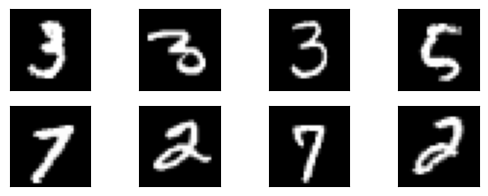

In [ ]:
# plot some images
fig = plt.figure()

idx_to_plot = [10, 30, 50, 2000, 40000, 5, 888, 555]

for i, idx in enumerate(idx_to_plot):
    ax = plt.subplot(len(idx_to_plot) // 2, len(idx_to_plot) // 2, i + 1)
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

plt.show()